In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class STF_Blackbox:
    def __init__(self, dim=2, std=5.0):
        self.dim = dim
        self._std = std
    def _stf(self, *coordinate):
        return sum([coordinate[d]**4-16*coordinate[d]**2+5*coordinate[d] for d in range(self.dim)])/2
    def observation(self, *coordinate):
        #print(coordinate)
        return self._stf(*coordinate) + np.random.randn()*self._std

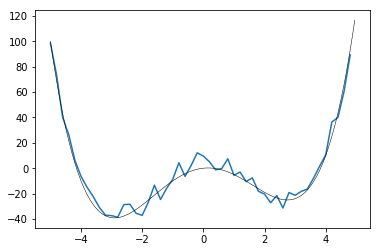

In [3]:
box = STF_Blackbox(1)
plt.plot(np.arange(-5, 5, 0.2), [box.observation(x) for x in np.arange(-5, 5, 0.2)])
plt.plot(np.arange(-5, 5, 0.05), [box._stf(x) for x in np.arange(-5, 5, 0.05)], linewidth=0.5, color="black")

In [4]:
import GPyOpt
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-5,5)}]
myBopt_n = GPyOpt.methods.bayesian_optimization.BayesianOptimization(
    f=box.observation, domain=bounds, model_type='GP', acquisition_type='EI', initial_design_numdata=3)
myBopt_n.run_optimization()

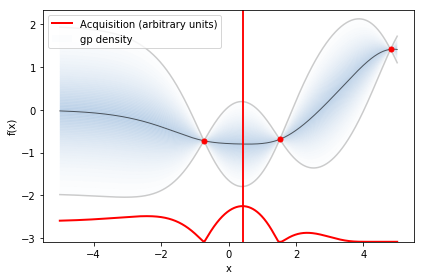

In [5]:
myBopt_n.plot_acquisition()

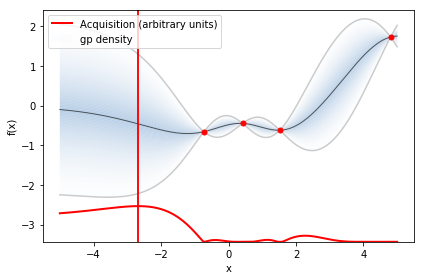

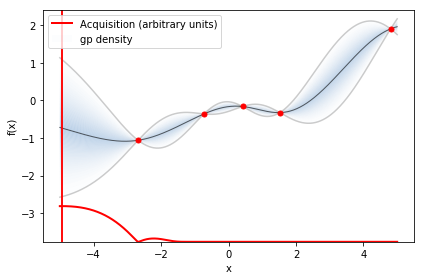

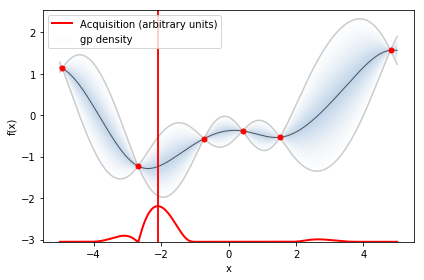

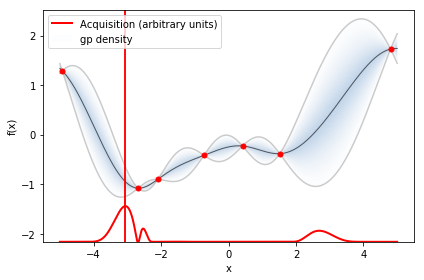

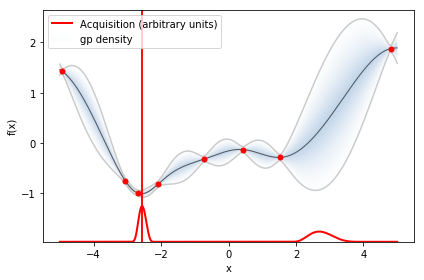

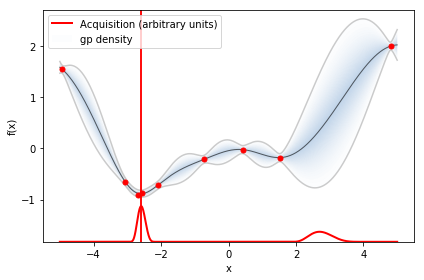

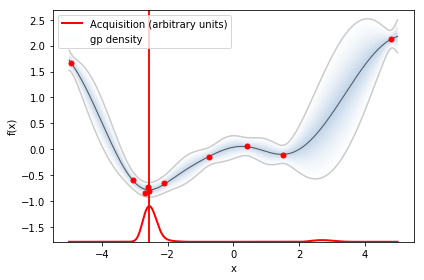

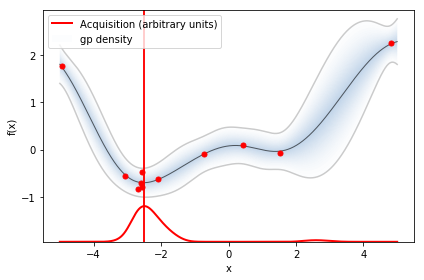

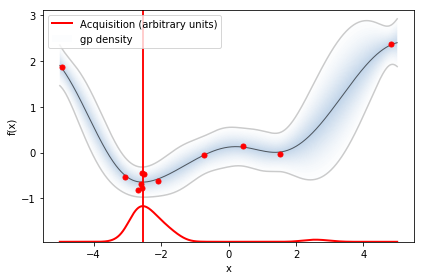

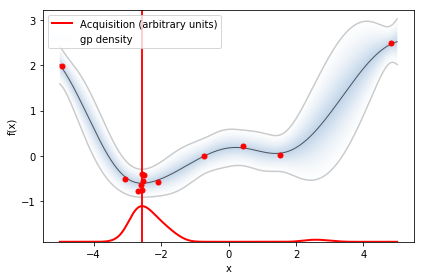

In [6]:
for _ in range(10):
    myBopt_n.run_optimization(max_iter=1)
    myBopt_n.plot_acquisition()
    plt.show()

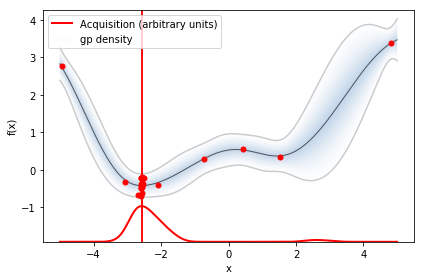

In [7]:
myBopt_n.run_optimization(max_iter=10)
myBopt_n.plot_acquisition()
plt.show()

In [8]:
myBopt_n.x_opt, myBopt_n.fx_opt

(array([-2.59469813]), -46.91180235053446)

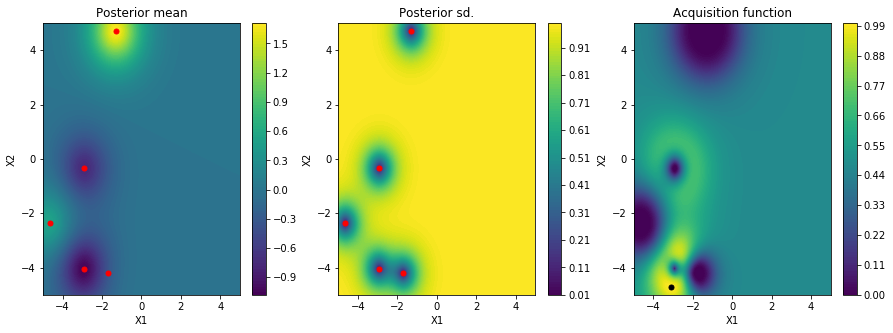

In [18]:
bounds = [{'name': 'x', 'type': 'continuous', 'domain': (-5,5)},
         {'name': 'y', 'type': 'continuous', 'domain': (-5,5)}]
box2 = STF_Blackbox(2)
myBopt_2n = GPyOpt.methods.bayesian_optimization.BayesianOptimization(
    f=lambda x: box2.observation(*x[0]), 
    domain=bounds, model_type='GP', acquisition_type='EI', initial_design_numdata=5)
myBopt_2n.run_optimization()
myBopt_2n.plot_acquisition()

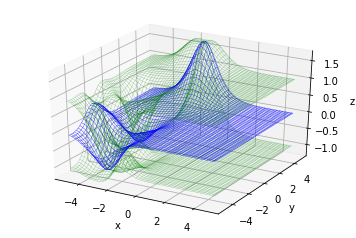

In [19]:
x_lin = np.arange(-5, 5, 0.1)
y_lin = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x_lin, y_lin)

z_mean, z_std = myBopt_2n.model.model.predict(np.stack([x.flatten(),y.flatten()]).T)
z_mean = z_mean.reshape(x_lin.size, y_lin.size)
z_std = z_std.reshape(x_lin.size, y_lin.size)

fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_zlim(0.8,0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(x, y, z_mean, color='blue',linewidth=0.3)
ax.plot_wireframe(x, y, z_mean+z_std, color='green',linewidth=0.3, alpha=0.5)
ax.plot_wireframe(x, y, z_mean-z_std, color='green',linewidth=0.3, alpha=0.5)
#ax.plot_surface(x, y, z_mean.reshape(x_lin.size, y_lin.size), rstride=1, cstride=1, cmap='hsv', linewidth=0.3)

plt.show() # 絵の出力。

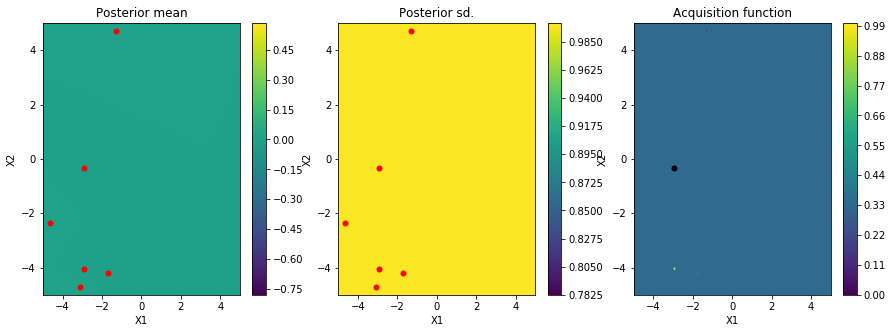

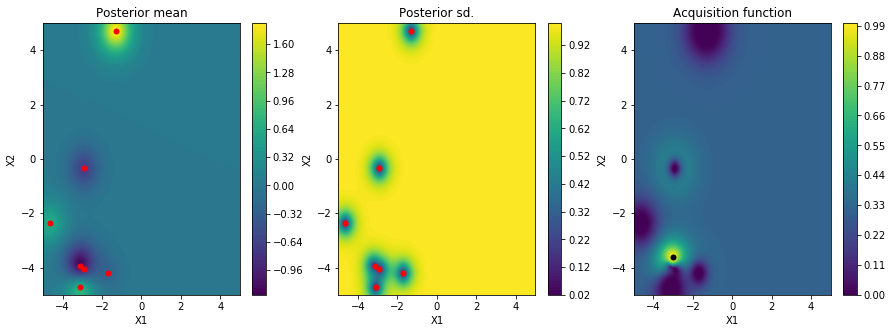

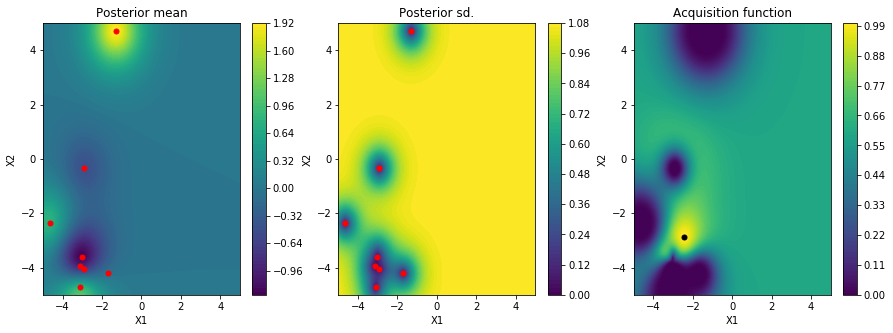

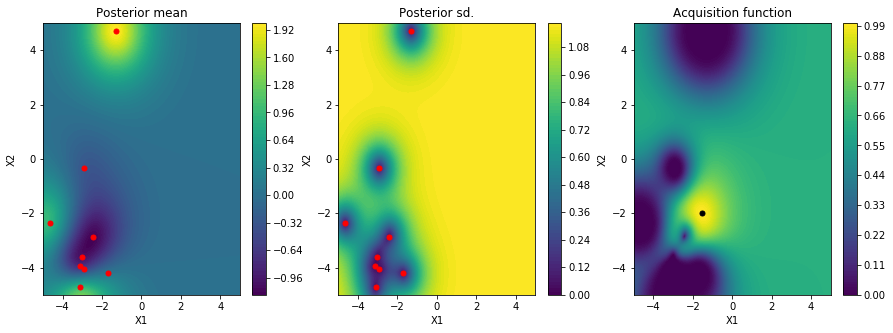

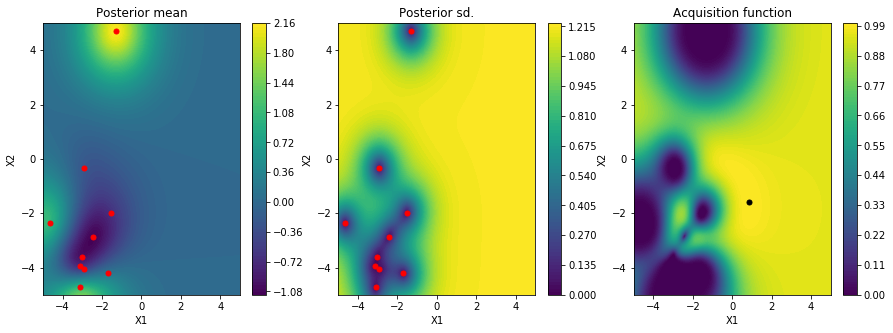

In [20]:
for _ in range(5):
    myBopt_2n.run_optimization(max_iter=1)
    myBopt_2n.plot_acquisition()
    plt.show()

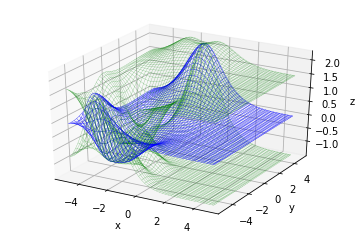

In [21]:
z_mean, z_std = myBopt_2n.model.model.predict(np.stack([x.flatten(),y.flatten()]).T)
z_mean = z_mean.reshape(x_lin.size, y_lin.size)
z_std = z_std.reshape(x_lin.size, y_lin.size)

fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_zlim(0.8,0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(x, y, z_mean, color='blue',linewidth=0.3)
ax.plot_wireframe(x, y, z_mean+z_std, color='green',linewidth=0.3, alpha=0.5)
ax.plot_wireframe(x, y, z_mean-z_std, color='green',linewidth=0.3, alpha=0.5)
#ax.plot_surface(x, y, z_mean.reshape(x_lin.size, y_lin.size), rstride=1, cstride=1, cmap='hsv', linewidth=0.3)

plt.show() # 絵の出力。

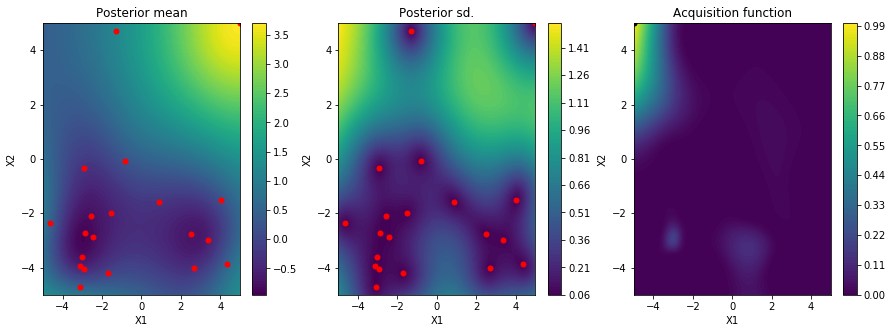

In [22]:
myBopt_2n.run_optimization(max_iter=10)
myBopt_2n.plot_acquisition()
plt.show()

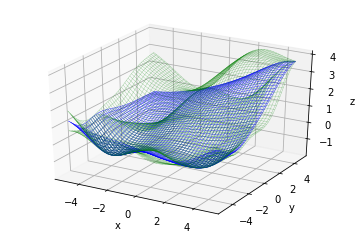

In [23]:
z_mean, z_std = myBopt_2n.model.model.predict(np.stack([x.flatten(),y.flatten()]).T)
z_mean = z_mean.reshape(x_lin.size, y_lin.size)
z_std = z_std.reshape(x_lin.size, y_lin.size)

fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_zlim(0.8,0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(x, y, z_mean, color='blue',linewidth=0.3)
ax.plot_wireframe(x, y, z_mean+z_std, color='green',linewidth=0.3, alpha=0.5)
ax.plot_wireframe(x, y, z_mean-z_std, color='green',linewidth=0.3, alpha=0.5)
#ax.plot_surface(x, y, z_mean.reshape(x_lin.size, y_lin.size), rstride=1, cstride=1, cmap='hsv', linewidth=0.3)

plt.show() # 絵の出力。

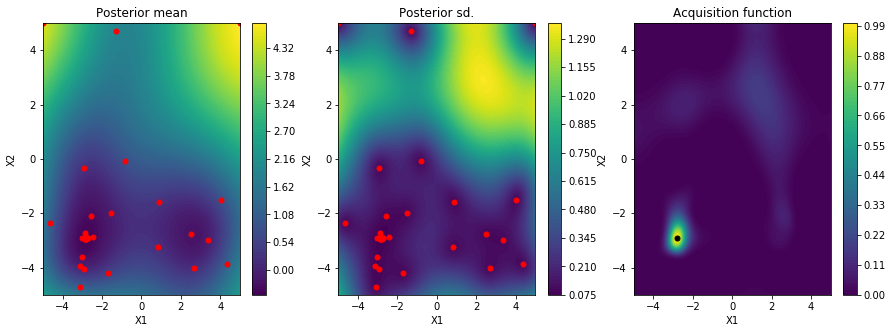

In [24]:
myBopt_2n.run_optimization(max_iter=40)
myBopt_2n.plot_acquisition()
plt.show()

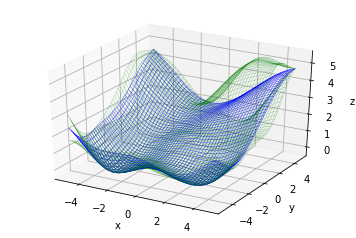

In [26]:
z_mean, z_std = myBopt_2n.model.model.predict(np.stack([x.flatten(),y.flatten()]).T)
z_mean = z_mean.reshape(x_lin.size, y_lin.size)
z_std = z_std.reshape(x_lin.size, y_lin.size)

fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_zlim(0.8,0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(x, y, z_mean, color='blue',linewidth=0.3)
ax.plot_wireframe(x, y, z_mean+z_std, color='green',linewidth=0.3, alpha=0.5)
ax.plot_wireframe(x, y, z_mean-z_std, color='green',linewidth=0.3, alpha=0.5)
#ax.plot_surface(x, y, z_mean.reshape(x_lin.size, y_lin.size), rstride=1, cstride=1, cmap='hsv', linewidth=0.3)

plt.show() # 絵の出力。

In [25]:
myBopt_2n.x_opt, myBopt_2n.fx_opt

(array([-2.79793531, -2.91749935]), -90.62187612566935)